<a href="https://colab.research.google.com/github/PavloZakala/CNN/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

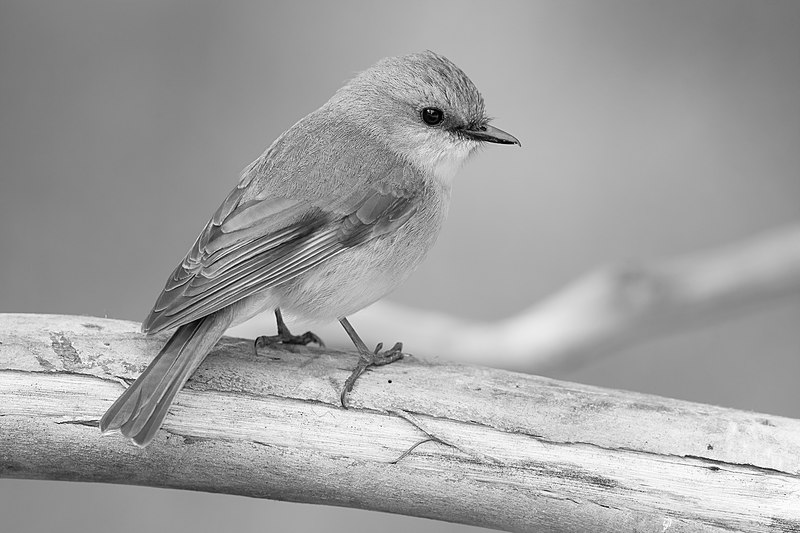

In [ ]:
import requests
from PIL import Image, ImageOps
import numpy as np

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Eopsaltria_australis_-_Mogo_Campground.jpg/800px-Eopsaltria_australis_-_Mogo_Campground.jpg'

data = requests.get(url).content
f = open('bird.jpg','wb')

f.write(data)
f.close()

bird_color = Image.open('bird.jpg')
bird_gray = ImageOps.grayscale(bird_color)

bird_gray

# Типи згорткових шарів

## Класичний згортковий шар

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Fw-ehcNBR9byHtho-Rxbtw.gif" alt="drawing" width="500"/>


https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
import torch
from torch import nn

from matplotlib import pyplot as plt

def show_torch_array(img, channel=0):
    plt.imshow(img[0, :, :].numpy())

    c, h, w = img.shape
    for i in range(w):
        for j in range(h):
            plt.text(j, i, f"{float(img[channel, i, j]):.2f}", ha="center", va="center", color="w", fontsize=7)
    plt.show()

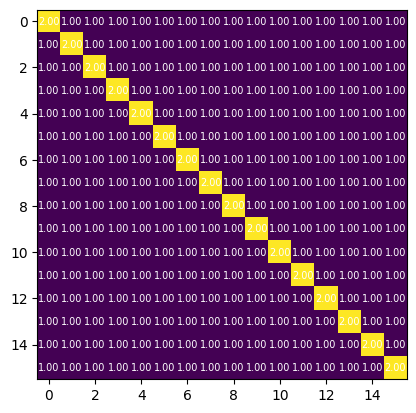

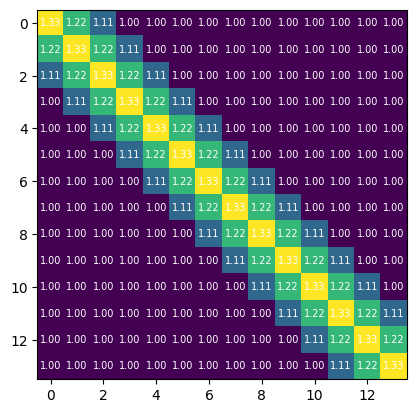

In [ ]:
in_channels = 1
out_channels = 1
kernel_size = 3
stride = 1
padding = 0

conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/9)

ones_image = torch.ones(1, 16, 16) + torch.eye(16)
show_torch_array(ones_image)

out = conv_layer(ones_image)
show_torch_array(out)


array([[[121.82289 , 122.04507 , 122.23777 , ..., 119.24052 ,
         119.08858 , 118.93211 ],
        [121.75261 , 121.97251 , 122.1652  , ..., 119.2541  ,
         119.09762 , 118.93661 ],
        [121.68686 , 121.90448 , 122.09717 , ..., 119.26996 ,
         119.106674, 118.94113 ],
        ...,
        [138.33353 , 138.40381 , 138.47864 , ..., 193.00674 ,
         192.99313 , 193.27203 ],
        [138.29277 , 138.36758 , 138.44693 , ..., 188.92513 ,
         188.92738 , 189.17455 ],
        [138.25882 , 138.33815 , 138.42203 , ..., 184.94554 ,
         184.87073 , 185.03625 ]]], dtype=float32)

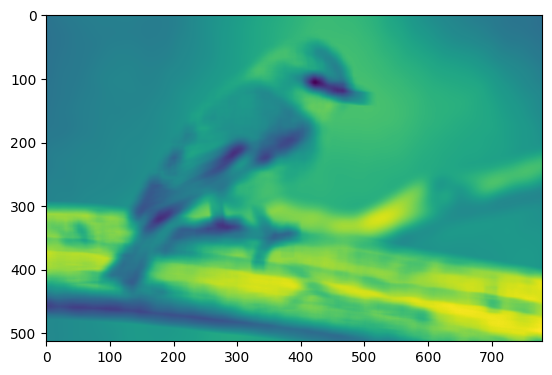

In [ ]:
conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size=21, stride, padding, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1 / 441)

input_img = np.array(bird_gray).astype(float)
out = conv_layer(torch.asarray(input_img, dtype=torch.float32).unsqueeze(0))

plt.imshow(out.numpy()[0])
out.numpy()

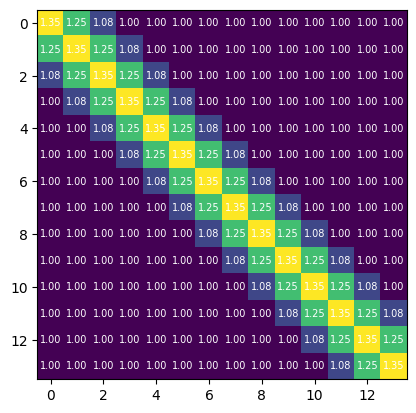

In [ ]:
import numpy as np

def gausian_kernel(size, sigma=1):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g / g.sum()

conv_layer = nn.Conv2d(1, 1, 3, 1, 0, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data = torch.asarray(gausian_kernel(3, 1), dtype=torch.float32).reshape(1, 1, 3, 3)

out = conv_layer(ones_image)
show_torch_array(out)

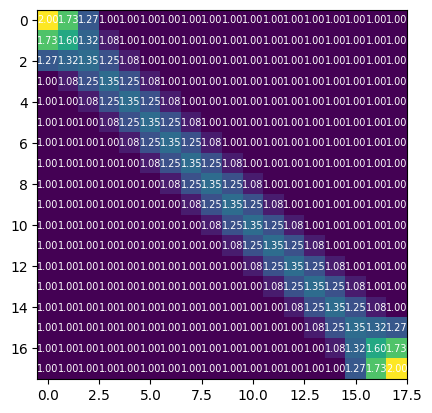

In [ ]:
conv_layer = nn.Conv2d(1, 1, 3, 1, 2, bias=False, padding_mode="replicate")
conv_layer.weight.requires_grad = False
conv_layer.weight.data = torch.asarray(gausian_kernel(3, 1), dtype=torch.float32).reshape(1, 1, 3, 3)

out = conv_layer(ones_image)
show_torch_array(out)

torch.Size([1, 1, 1, 1])


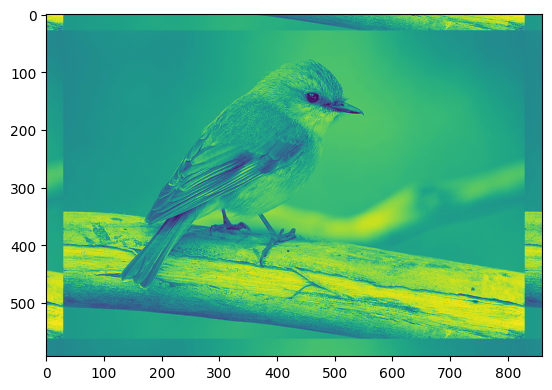

In [ ]:
conv_layer = nn.Conv2d(1, 1, 1, 1, 30, bias=False, padding_mode="circular")
conv_layer.weight.requires_grad = False
print(conv_layer.weight.data.shape)

conv_layer.weight.data = torch.asarray([[1.0]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

out = conv_layer(torch.asarray(input_img, dtype=torch.float32).unsqueeze(0))
plt.imshow(out.numpy()[0])

# 16x 16 -> 14x14
#               + ->
# -> 14x14

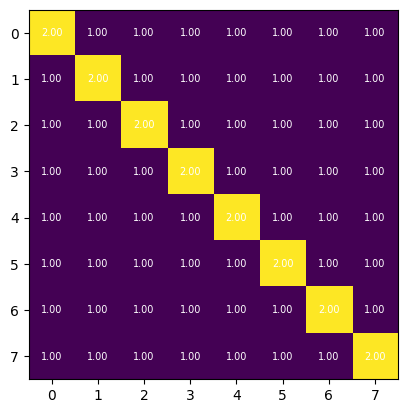

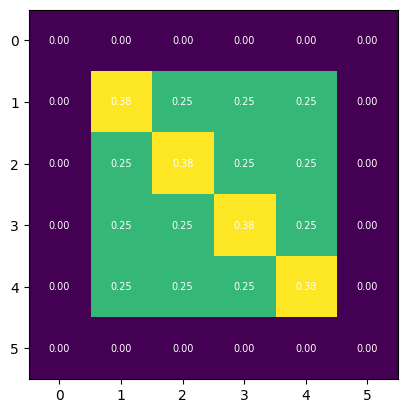

In [ ]:
conv_layer = nn.Conv2d(1, 1, 2, 2, 2, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/16) # = torch.asarray(gausian_kernel(3, 1), dtype=torch.float32).reshape(1, 1, 3, 3)

ones_image = torch.ones(1, 8, 8) + torch.eye(8)
show_torch_array(ones_image)

out = conv_layer(ones_image)
show_torch_array(out)

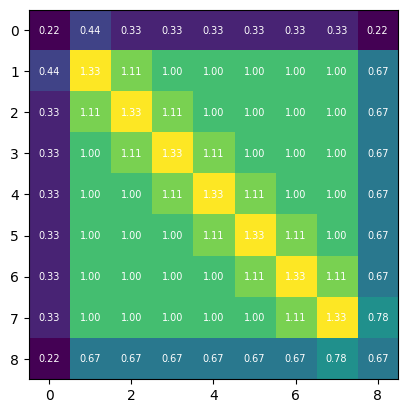

In [ ]:
conv_layer = nn.Conv2d(1, 1, 3, 2, 2, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/9)

out = conv_layer(ones_image)
show_torch_array(out)

torch.Size([3, 1, 3, 3])


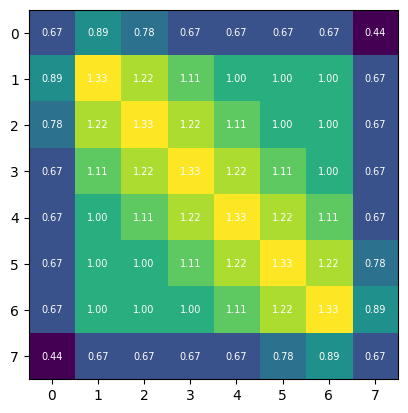

In [ ]:
conv_layer = nn.Conv2d(1, 3, 3, 1, 1, bias=False)
conv_layer.weight.requires_grad = False
print(conv_layer.weight.data.shape)
conv_layer.weight.data.fill_(1/9)

out = conv_layer(ones_image)
show_torch_array(out)

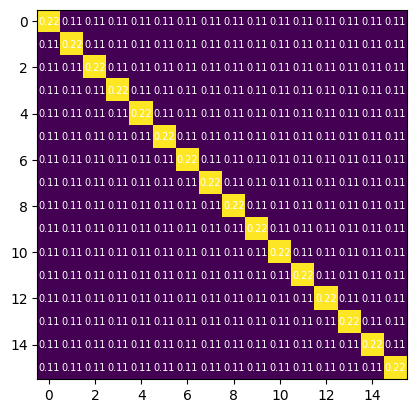

In [ ]:
# 1x1 Convolution
conv_layer = nn.Conv2d(1, 3, 1, 1, 0, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/9)

out = conv_layer(ones_image)
show_torch_array(out)

# Завдання

Зібрати з блоків шар ResNeXt
https://arxiv.org/pdf/1611.05431 - ДЗ

# Pooling layers

https://pytorch.org/docs/stable/nn.html#pooling-layers



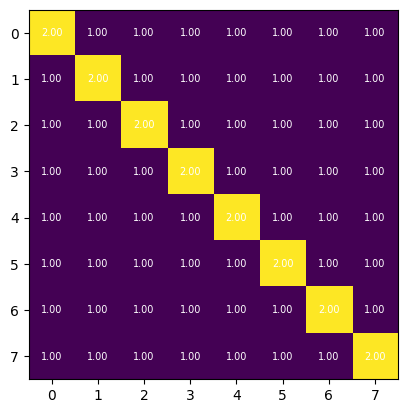

In [ ]:
max_pool = nn.MaxPool2d(2, stride=2, padding=0)

ones_image = torch.ones(1, 16, 16) + torch.eye(16)

out = max_pool(ones_image)
show_torch_array(out)

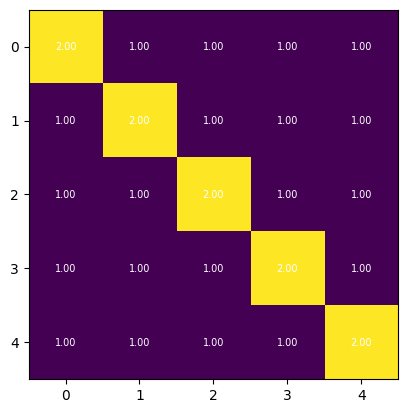

In [ ]:
max_pool = nn.MaxPool2d(3, 3, 0)

out = max_pool(ones_image)
show_torch_array(out)

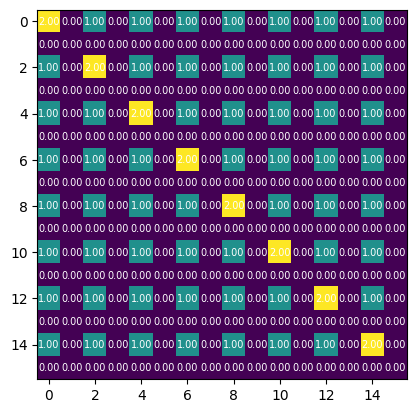

In [ ]:
pool = nn.MaxPool2d(2, stride=2, return_indices=True)
unpool = nn.MaxUnpool2d(2, stride=2)

output, indices = pool(ones_image)
out = unpool(output, indices)

show_torch_array(out)

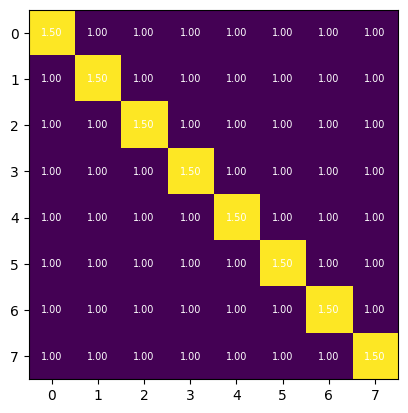

In [ ]:
avg_pool = nn.AvgPool2d(2, 2, 0)

out = avg_pool(ones_image)
show_torch_array(out)

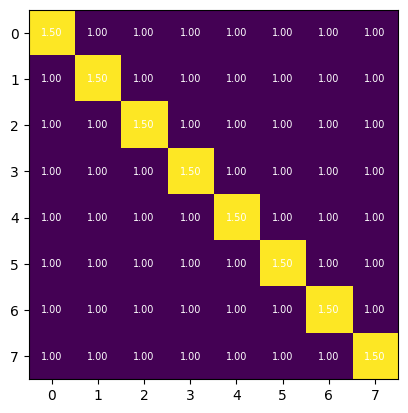

In [ ]:
# Як зібрати AvgPool2d з допомогою Conv2d?

conv_layer = nn.Conv2d(1, 1, 2, 2, 0, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/4)

out = avg_pool(ones_image)
show_torch_array(out)

# Задача

Написати реалізацію операцій forward та backward для Conv2d

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function

class MyConv2dFunction(Function):
    @staticmethod
    def forward(ctx, x, weight, bias=None, stride=1, padding=0, dilation=1):
        """
        x:       (N, C_in, H, W)
        weight:  (C_out, C_in, kH, kW)
        bias:    (C_out,) or None
        stride, padding, dilation: int or (h, w) tuples
        """
        # Forward implementation here
        pass


    @staticmethod
    def backward(ctx, grad_output):
        """
        grad_output: (N, C_out, H_out, W_out)
        returns gradients for (x, weight, bias, stride, padding, dilation)
        """
        # Backward implementation here
        pass


class MyConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size,
                 stride=1, padding=0, dilation=1, bias=True):
        super().__init__()
        self.kernel_size = kernel_size
        self.weight = nn.Parameter(torch.randn(out_channels, in_channels, *kernel_size))
        self.bias = nn.Parameter(torch.zeros(out_channels)) if bias else None
        self.stride = stride
        self.padding = padding
        self.dilation = dilation

    def forward(self, x):
        return MyConv2dFunction.apply(x, self.weight, self.bias, self.stride, self.padding, self.dilation)

In [ ]:
# Test
device = "cuda" if torch.cuda.is_available() else "cpu"
B, C, H, W = 2, 1, 3, 3
C_out = 2

x = torch.randn(B, C, H, W, device=device, requires_grad=True)

myconv = MyConv2d(C, C_out, (3, 3), stride=1, padding=1, dilation=1, bias=True).to(device)
target_conv = nn.Conv2d(C, C_out, (3, 3), stride=1, padding=1, dilation=1, bias=True).to(device)

with torch.no_grad():
    target_conv.weight.copy_(myconv.weight)
    if myconv.bias is not None:
        target_conv.bias.copy_(myconv.bias)

# Forward check
y_my = myconv(x)
y_target = target_conv(x)
print(y_my.shape, y_target.shape)
print(y_my)
print(y_target)

print("Forward check:", torch.allclose(y_my, y_target, atol=1e-6, rtol=1e-5))

# Backward check
loss_my = y_my.square().mean()
loss_ref = y_target.square().mean()
loss_my.backward()
loss_ref.backward()

print("w grad close:", torch.allclose(myconv.weight.grad, target_conv.weight.grad, atol=1e-6, rtol=1e-5))
if myconv.bias is not None:
    print("b grad close:", torch.allclose(myconv.bias.grad, target_conv.bias.grad, atol=1e-6, rtol=1e-5))
